# Backpropagation algorithm to train a DNN with at least 2 hidden layers

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
25/25 [==============================] - 2s 13ms/step - loss: 0.6381 - accuracy: 0.6725 - val_loss: 0.6232 - val_accuracy: 0.6900
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.8025 - val_loss: 0.5552 - val_accuracy: 0.7600
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8363 - val_loss: 0.4864 - val_accuracy: 0.8050
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8612 - val_loss: 0.4322 - val_accuracy: 0.8300
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8775 - val_loss: 0.4092 - val_accuracy: 0.8400
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8863 - val_loss: 0.3951 - val_accuracy: 0.8450
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.8888 - val_loss: 0.3820 - val_accuracy: 0.8350
Epoch 8/50
25/25 [=

In [3]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8050000071525574


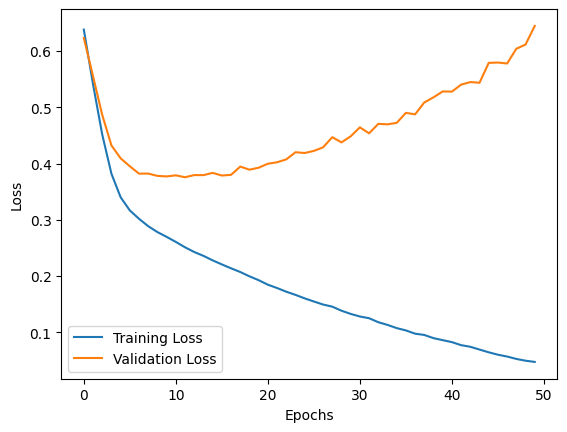

In [4]:
# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()